In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from numpy import genfromtxt
from sklearn.decomposition import PCA
import numpy as np
import csv

In [15]:
training_data = genfromtxt('training.csv',dtype = str, delimiter=',')

In [16]:
train_labels = training_data[1:,-1]
train_labels = (train_labels == 's').astype(np.int32)
train_data = training_data[1:,1:31]
train_data = train_data.astype(np.float32)

In [17]:
a, b = np.where(train_data == -999)
new_r, new_c = np.where(train_data != -999)
mean_list = np.mean(train_data[new_r][new_c], axis = 0)

In [18]:
for i in range(len(a)):
    train_data[a[i]][train_data[a[i]] == -999] = mean_list[b[i]]
x, y = np.where(train_data == -999)
print(x,y)

(array([], dtype=int64), array([], dtype=int64))


In [19]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)

In [20]:
pca = PCA(.95)
pca.fit(train_data)
pca.n_components_
train_data = pca.transform(train_data)

In [21]:
print(pca.n_components_)
np.savetxt("training_data_pca.csv", train_data, delimiter=",")

15


In [22]:
# calculate Pearson's correlation
from scipy.stats import pearsonr
n = len(train_data[0])
dict1={}
for i in range(1,n-2):
    l= []
    for j in range(1,n-2):
        corr, _ = pearsonr(train_data[:,i], train_data[:,j])
        l.append(corr)
    dict1[training_data[0][i]]=l

dataframe = pd.DataFrame.from_dict(dict1, orient='index',columns=training_data[0][1:n-2])


#check for relations where there is 0.95 correlation
dict2={}
for key in dict1:
    n = len(dict1[key])
    for i in range(0,n):
        if dict1[key][i]>=0.95 and key!=training_data[0][i+1]:
            if key>training_data[0][i+1]:
                a = training_data[0][i+1]
                b = key
            else:
                a = key
                b = training_data[0][i+1]
            dict2[(a,b)]=dict1[key][i]

for key in dict2:
    print (key,dict2[key])

In [23]:
dataCsv = dataframe.to_csv(index=True)
f = open('correlation.csv','w+')
f.write(dataCsv)

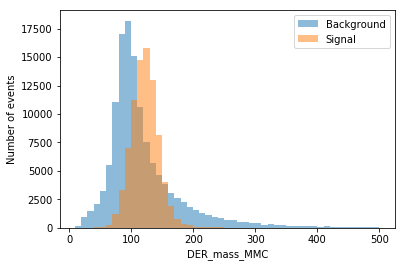

In [24]:
# Plot of DER_mass_MC
import random
import numpy
from matplotlib import pyplot

filename='training.csv'
data = genfromtxt(filename,dtype = float, delimiter=',');
data1 = genfromtxt(filename,dtype = str, delimiter=',');
Mass = data[1:,1]
Y = data1[1:,32]
Y = np.array(Y)

Mass = np.array(Mass)
Msignal = Mass[Y=='s'];
Mbackground = Mass[Y=='b'];
bins = numpy.linspace(9, 500, 50)
pyplot.hist(Mbackground, bins, alpha=0.5, label='Background')
pyplot.hist(Msignal, bins, alpha=0.5, label='Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel('DER_mass_MMC')
pyplot.ylabel('Number of events')
pyplot.show()

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from collections import Counter

clf = GaussianNB()
clf = clf.fit(train_data[:200000], train_labels[:200000])
clf.score(train_data[200000:],train_labels[200000:])

0.72692

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf = clf.fit(train_data[:200000], train_labels[:200000])
clf.score(train_data[200000:],train_labels[200000:])

/home/sanika/.local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf = clf.fit(train_data[:200000], train_labels[:200000])
clf.score(train_data[200000:],train_labels[200000:])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_data[:200000], train_labels[:200000])
clf.score(train_data[200000:],train_labels[200000:])

In [ ]:
from sklearn.svm import SVC
clf = SVC(probability=True)
clf.fit(train_data[:200000], train_labels[:200000])
clf.score(train_data[200000:], train_labels[200000:])

In [ ]:
#experimenting on different parameters of svm
from sklearn import svm
X,Y = train_data,train_labels
W = training_data[1:,31]
W = W.astype(np.float64)

X1 = X[:100000];
W1 = W[:100000];
Y1 = Y[:100000];
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

print("\nExperimenting for different kernels")
for kernel in kernels:
    svc= svm.SVC(kernel=kernel).fit(X1,Y1)
#     plotSVC('kernel=' + str(kernel))
    svmScore = svc.score(X[100000:200000],Y[100000:200000])
    print("Kernel ", kernel," Svm score for test data:",svmScore)
    
print("\nExperimenting for different gammas")
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, Y)
    svmScore = svc.score(X[100000:200000],Y[100000:200000])
#     plotSVC(‘gamma=’ + str(gamma))
    print("Gamma:", gamma," Svm score for test data:",svmScore)
    
print("\nExperimenting for different Regularization parameters")
for c in Cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X, Y)
    svmScore = svc.score(X[100000:200000],Y[100000:200000])
#     plotSVC(‘C=’ + str(c))
    print("C:", c," Svm score for test data:",svmScore)

print("\nExperimenting for different Degrees for polynomial kernel")
degrees = [0, 1, 2, 3, 4]
for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X, Y)
    svmScore = svc.score(X[100000:200000],Y[100000:200000])
    print("Degree ", degree," Svm score for test data:",svmScore)
    


Experimenting for different Regularization parameters
('C:', 0.001, ' Svm score for test data:', 0.7679)
('C:', 0.01, ' Svm score for test data:', 0.81021)
('C:', 0.1, ' Svm score for test data:', 0.82826)
('C:', 1, ' Svm score for test data:', 0.83924)
('C:', 10, ' Svm score for test data:', 0.85133)

Experimenting for different Degrees for polynomial kernel
('Degree ', 0, ' Svm score for test data:', 0.65666)
('Degree ', 1, ' Svm score for test data:', 0.72278)
('Degree ', 2, ' Svm score for test data:', 0.80722)
('Degree ', 3, ' Svm score for test data:', 0.80736)
